# Step 1: Importing the Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In this step, we import the Pandas library, a powerful data manipulation and analysis tool for Python. It provides data structures like DataFrames that make it easy to work with structured data.

# Step 2: Loading CSV and Excel Files

In [9]:

# Load all CSV files
cost_of_living = pd.read_csv('cost_of_living.csv')
country_codes = pd.read_excel('country_codes (1).xlsx')
ds_salaries = pd.read_csv('ds_salaries.csv')
levels_salaries = pd.read_csv('Levels_Fyi_Salary_Data.csv')

# Preview the data
print("Cost of Living Data:")
print(cost_of_living.head())
print("\nCountry Codes Data:")
print(country_codes.head())
print("\nData Scientist Salaries Data:")
print(ds_salaries.head())
print("\nLevels Salary Data:")
print(levels_salaries.head())


Cost of Living Data:
   Rank                 City  Cost of Living Index  Rent Index  \
0   NaN    Hamilton, Bermuda                149.02       96.10   
1   NaN  Zurich, Switzerland                131.24       69.26   
2   NaN   Basel, Switzerland                130.93       49.38   
3   NaN     Zug, Switzerland                128.13       72.12   
4   NaN  Lugano, Switzerland                123.99       44.99   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          124.22           157.89                  155.22   
1                          102.19           136.14                  132.52   
2                           92.70           137.07                  130.95   
3                          101.87           132.61                  130.93   
4                           86.96           129.17                  119.80   

   Local Purchasing Power Index  
0                         79.43  
1                        129.79  
2          

In this section, we load multiple datasets into DataFrames:

Cost of Living Data: Loaded from a CSV file named cost_of_living.csv. This dataset likely contains information about the cost of living across various cities or countries.

Country Codes Data: Loaded from an Excel file named country_codes (1).xlsx. This dataset typically includes country names along with their respective codes (Alpha-2 and Alpha-3) for easier reference in analysis.

Data Scientist Salaries Data: Loaded from a CSV file named ds_salaries.csv. This dataset contains salary information for data scientists, potentially providing insights into salary ranges based on various factors.

Levels Salary Data: Loaded from a CSV file named Levels_Fyi_Salary_Data.csv. This dataset might provide salary data across different job levels and industries, giving a broader context for salary comparisons.

We print the first few rows of each DataFrame using the .head() method. This allows us to quickly inspect the structure and contents of the data:

Cost of Living Data: Displays the first five rows of the cost of living dataset, providing a snapshot of the columns and data types.

Country Codes Data: Displays the first five rows of the country codes dataset, helping us verify that country names and codes are loaded correctly.

Data Scientist Salaries Data: Displays the first five rows of the data scientist salaries dataset, allowing us to check the relevant features like job title, company, and salary.

Levels Salary Data: Displays the first five rows of the levels salary dataset, helping us ensure that salary levels and related information are accurately loaded.

# Step 4: Standardizing Country Names and Checking for Missing Country Codes

In [18]:
# Standardize the country names to ensure they match between datasets
cost_of_living['Country'] = cost_of_living['City'].apply(lambda x: x.split(", ")[-1])

# Check for missing country codes
missing_countries = cost_of_living[~cost_of_living['Country'].isin(country_codes['Country'])]
print(f"Missing Countries: \n{missing_countries}")


Missing Countries: 
     Rank                                   City  Cost of Living Index  \
10    NaN            Honolulu, HI, United States                103.65   
13    NaN            New York, NY, United States                100.00   
18    NaN       Santa Barbara, CA, United States                 95.01   
20    NaN            Berkeley, CA, United States                 94.36   
21    NaN       San Francisco, CA, United States                 93.91   
..    ...                                    ...                   ...   
495   NaN                    Novosibirsk, Russia                 32.26   
496   NaN                 Rostov-na-donu, Russia                 32.10   
498   NaN                      Chisinau, Moldova                 31.82   
501   NaN                           Tehran, Iran                 31.47   
535   NaN  Pristina, Kosovo (Disputed Territory)                 26.15   

     Rent Index  Cost of Living Plus Rent Index  Groceries Index  \
10        65.07        

n this section, we check for any missing country codes in the Cost of Living dataset:

We create a new DataFrame, missing_countries, which contains entries from the cost_of_living DataFrame where the Country does not exist in the Country Codes dataset.

The isin() method checks if the country names in the Country column of cost_of_living are present in the Country column of country_codes. The tilde (~) operator negates this condition, effectively filtering for missing countries.

Finally, we print the missing_countries DataFrame to identify any discrepancies in country names that may need to be resolved before further analysis or merging of datasets.


# Step 6: Displaying Unique Missing Countries

In [20]:
# Display the unique missing countries
missing_countries_unique = missing_countries['Country'].unique()
print("Unique Missing Countries:")
print(missing_countries_unique)


Unique Missing Countries:
['United States' 'Bahamas' 'United Kingdom' 'Netherlands' 'South Korea'
 'Taiwan' 'United Arab Emirates' 'Trinidad And Tobago' 'Philippines'
 'Czech Republic' 'Ivory Coast' 'Venezuela' 'Dominican Republic' 'Russia'
 'Vietnam' 'Bosnia And Herzegovina' 'Bolivia' 'Iran' 'Syria'
 'North Macedonia' 'Tanzania' 'Moldova' 'Kosovo (Disputed Territory)']


In this step, we focus on identifying and displaying the unique countries that are missing from the Country Codes dataset:

We create a new variable, missing_countries_unique, which stores the unique values from the Country column of the missing_countries DataFrame.

The unique() method retrieves an array of unique country names that were identified as missing in the previous step.

Finally, we print the list of Unique Missing Countries to provide a clear view of which country names need to be addressed. This helps in identifying potential inconsistencies or errors that may need correction for accurate data analysis or merging with other datasets.

# Step 7: Checking for Variations of Missing Countries

In [21]:
# Check for variations of the missing countries in the country codes dataset
for country in missing_countries_unique:
    matches = country_codes[country_codes['Country'].str.contains(country.split('(')[0].strip(), case=False, na=False)]
    if not matches.empty:
        print(f"Potential matches for '{country}':")
        print(matches[['Country', 'Alpha-2 code', 'Alpha-3 code']])


Potential matches for 'United States':
                                        Country Alpha-2 code Alpha-3 code
234  United States Minor Outlying Islands (the)           UM          UMI
235              United States of America (the)           US          USA
Potential matches for 'Bahamas':
          Country Alpha-2 code Alpha-3 code
15  Bahamas (the)           BS          BHS
Potential matches for 'United Kingdom':
                                               Country Alpha-2 code  \
233  United Kingdom of Great Britain and Northern I...           GB   

    Alpha-3 code  
233          GBR  
Potential matches for 'Netherlands':
               Country Alpha-2 code Alpha-3 code
155  Netherlands (the)           NL          NLD
Potential matches for 'Taiwan':
                        Country Alpha-2 code Alpha-3 code
216  Taiwan (Province of China)           TW          TWN
Potential matches for 'United Arab Emirates':
                        Country Alpha-2 code Alpha-3 code
232  Unite

In this step, we aim to identify any potential variations of the missing country names within the Country Codes dataset:

We iterate through each country in the missing_countries_unique array using a for loop.

For each country, we utilize the str.contains() method on the Country column of the country_codes DataFrame. This method checks for occurrences of the country name (before any parentheses) in a case-insensitive manner, while also accounting for missing values.

If any matches are found (i.e., if the matches DataFrame is not empty), we print the potential matches along with their corresponding Country, Alpha-2 code, and Alpha-3 code. This allows us to see variations or alternative names for the countries that were identified as missing, providing insights that may help in reconciling discrepancies between datasets.


# Step 8: Mapping Missing Countries to Standardized Country Names

In [22]:
# Mapping of missing countries to standardized country names
country_mapping = {
    'United States': 'United States of America (the)',
    'Bahamas': 'Bahamas (the)',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland (the)',
    'Netherlands': 'Netherlands (the)',
    'South Korea': 'Republic of Korea',
    'Taiwan': 'Taiwan (Province of China)',
    'United Arab Emirates': 'United Arab Emirates (the)',
    'Trinidad And Tobago': 'Trinidad and Tobago',
    'Philippines': 'Philippines (the)',
    'Czech Republic': 'Czechia',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Venezuela': 'Venezuela (Bolivarian Republic of)',
    'Dominican Republic': 'Dominican Republic (the)',
    'Russia': 'Russian Federation (the)',
    'Vietnam': 'Viet Nam',
    'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
    'Bolivia': 'Bolivia (Plurinational State of)',
    'Iran': 'Iran (Islamic Republic of)',
    'Syria': 'Syrian Arab Republic',
    'North Macedonia': 'Republic of North Macedonia',
    'Tanzania': 'Tanzania, United Republic of',
    'Moldova': 'Moldova (the Republic of)',
    'Kosovo (Disputed Territory)': 'Kosovo'
}


In this step, we create a country_mapping dictionary to standardize the names of countries that were previously identified as missing. The mapping serves several purposes:

Normalization: Different datasets may have variations in how countries are named, such as "United States" versus "United States of America (the)". This mapping helps to align those variations to a single, consistent name.

Integration: By standardizing country names, we can facilitate smoother data merging and analysis across multiple datasets. It ensures that when we reference a country, it is consistently represented in the same format.

Clarity: Some country names may include additional descriptors (e.g., "Bolivarian Republic of") or may be represented differently in various datasets (e.g., "Czech Republic" vs. "Czechia"). The mapping clarifies these differences, making the data more understandable and accurate for further processing.


# Step 9: Updating Country Names in the Cost of Living Data

In [23]:
# Update the Country column in cost_of_living based on the mapping
cost_of_living['Country'] = cost_of_living['Country'].replace(country_mapping)

# Verify that the missing countries are no longer present
missing_countries_updated = cost_of_living[~cost_of_living['Country'].isin(country_codes['Country'])]
print(f"Missing Countries After Update: \n{missing_countries_updated}")


Missing Countries After Update: 
     Rank                                   City  Cost of Living Index  \
64    NaN                     Seoul, South Korea                 78.66   
535   NaN  Pristina, Kosovo (Disputed Territory)                 26.15   

     Rent Index  Cost of Living Plus Rent Index  Groceries Index  \
64        33.87                           57.66            98.28   
535        9.04                           18.13            22.99   

     Restaurant Price Index  Local Purchasing Power Index            Country  
64                    47.26                         74.50  Republic of Korea  
535                   19.69                         47.48             Kosovo  


In this step, we perform two key operations:

Updating Country Names:

We update the Country column in the cost_of_living DataFrame using the country_mapping dictionary. The replace() function allows us to substitute any occurrences of the country names that match keys in the mapping with their corresponding standardized names. This ensures consistency across the dataset.

Verification of Updates:

After updating the country names, we check for any remaining missing countries. We create a new DataFrame, missing_countries_updated, that contains entries in the cost_of_living DataFrame whose Country values do not match any in the country_codes DataFrame. This serves as a verification step to ensure that our mapping was effective and that all previously missing countries have been accounted for.

This process is crucial in maintaining data integrity, allowing for more accurate analysis and comparisons across datasets by ensuring that country names are consistently represented.

# Step 10: Updating the Country Mapping Dictionary

In [24]:
# Update the mapping dictionary to include the missing countries
country_mapping.update({
    'South Korea': 'Republic of Korea',
    'Kosovo (Disputed Territory)': 'Kosovo'
})


In this step, we are enhancing the country_mapping dictionary by adding entries for any previously missing countries. Specifically:

Adding New Mappings:

We use the update() method of the dictionary to incorporate additional mappings. This allows us to specify that South Korea should be standardized to Republic of Korea and Kosovo
(Disputed Territory) should simply be Kosovo.

By updating the dictionary in this way, we ensure that these entries will be correctly mapped in future data cleaning or standardization processes.

Updating the mapping dictionary is important as it helps us maintain a comprehensive and accurate reference for all country names that may appear in our datasets. This ensures that our data remains consistent and aligned with internationally recognized country designations.

# Step 11: Updating the Country Column in Cost of Living Data

In [25]:
# Update the Country column in cost_of_living again
cost_of_living['Country'] = cost_of_living['Country'].replace(country_mapping)

# Verify if any missing countries remain
missing_countries_updated = cost_of_living[~cost_of_living['Country'].isin(country_codes['Country'])]
print(f"Missing Countries After Second Update: \n{missing_countries_updated}")


Missing Countries After Second Update: 
     Rank                                   City  Cost of Living Index  \
64    NaN                     Seoul, South Korea                 78.66   
535   NaN  Pristina, Kosovo (Disputed Territory)                 26.15   

     Rent Index  Cost of Living Plus Rent Index  Groceries Index  \
64        33.87                           57.66            98.28   
535        9.04                           18.13            22.99   

     Restaurant Price Index  Local Purchasing Power Index            Country  
64                    47.26                         74.50  Republic of Korea  
535                   19.69                         47.48             Kosovo  


In this step, we are performing a second update on the Country column in the cost_of_living DataFrame. The process involves:

Replacing Country Names:

The replace() method is called on the Country column of the cost_of_living DataFrame. It uses the country_mapping dictionary to substitute any country names with their standardized equivalents. This ensures that all country names are uniform and accurate based on our established mappings.

Verifying Updates:

After the replacement, we check if any missing countries remain in the cost_of_living DataFrame by filtering for rows where the Country does not exist in the country_codes DataFrame.

The result is stored in the missing_countries_updated variable and printed to the console.

This step is crucial for confirming the effectiveness of our country name standardization efforts. By verifying that no missing countries remain, we ensure that our datasets are properly aligned for subsequent analyses or merging processes.

Step 12: Merging Cost of Living Data with Country Codes

In [26]:
# Merge the cost_of_living DataFrame with country_codes to add country codes
merged_data = cost_of_living.merge(country_codes, how='left', on='Country')

# Display the first few rows of the merged DataFrame
print(merged_data.head())


   Rank                 City  Cost of Living Index  Rent Index  \
0   NaN    Hamilton, Bermuda                149.02       96.10   
1   NaN  Zurich, Switzerland                131.24       69.26   
2   NaN   Basel, Switzerland                130.93       49.38   
3   NaN     Zug, Switzerland                128.13       72.12   
4   NaN  Lugano, Switzerland                123.99       44.99   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          124.22           157.89                  155.22   
1                          102.19           136.14                  132.52   
2                           92.70           137.07                  130.95   
3                          101.87           132.61                  130.93   
4                           86.96           129.17                  119.80   

   Local Purchasing Power Index      Country Alpha-2 code Alpha-3 code  \
0                         79.43      Bermuda           BM   

In this step, we are merging the cost_of_living DataFrame with the country_codes DataFrame to enrich our dataset with additional country-related information. Here is what each part does:

Merging DataFrames:

The merge() function is used to combine the cost_of_living DataFrame with the country_codes DataFrame.

The how='left' parameter indicates that we are performing a left join, meaning all rows from the cost_of_living DataFrame will be retained, and matching rows from the country_codes DataFrame will be included based on the Country column.

This operation adds the relevant country codes to the corresponding countries in the cost_of_living DataFrame, which is crucial for subsequent analyses that may require these codes.

Displaying the Merged Data:

The head() function is called on the merged DataFrame merged_data to display the first few rows. This provides a quick overview of how the merge operation has enriched the original data, allowing us to verify that the country codes have been correctly added.

This step is essential for creating a comprehensive dataset that includes both cost of living information and corresponding country codes, facilitating better analysis and visualization in later stages of the project.



# Step 13: Adding Missing Countries and Updating the Merged Data

In [27]:
# Create a DataFrame for the missing countries
additional_countries = pd.DataFrame({
    'Country': ['Republic of Korea', 'Kosovo'],
    'Alpha-2 code': ['KR', 'XK'],  # Using 'XK' for Kosovo as per ISO 3166-1
    'Alpha-3 code': ['KOR', 'XKX'],
    'Numeric': [410, 383]
})

# Append the new countries to the existing country_codes DataFrame
country_codes = pd.concat([country_codes, additional_countries], ignore_index=True)

# Merge again with the updated country_codes DataFrame
merged_data = cost_of_living.merge(country_codes, how='left', on='Country')

# Display the first few rows of the updated merged DataFrame
print(merged_data.head())


   Rank                 City  Cost of Living Index  Rent Index  \
0   NaN    Hamilton, Bermuda                149.02       96.10   
1   NaN  Zurich, Switzerland                131.24       69.26   
2   NaN   Basel, Switzerland                130.93       49.38   
3   NaN     Zug, Switzerland                128.13       72.12   
4   NaN  Lugano, Switzerland                123.99       44.99   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          124.22           157.89                  155.22   
1                          102.19           136.14                  132.52   
2                           92.70           137.07                  130.95   
3                          101.87           132.61                  130.93   
4                           86.96           129.17                  119.80   

   Local Purchasing Power Index      Country Alpha-2 code Alpha-3 code  \
0                         79.43      Bermuda           BM   

In this step, we are addressing missing country codes by adding additional countries and updating the merged dataset.

Here is a breakdown of the code:

Creating a DataFrame for Missing Countries:

We create a new DataFrame called additional_countries that includes two missing countries: Republic of Korea and Kosovo.
The DataFrame contains columns for the country name, Alpha-2 code, Alpha-3 code, and a Numeric code, which are standard representations used in datasets for country identification. Kosovo is represented using 'XK' as its Alpha-2 code, following the ISO 3166-1 standard.

Appending to Existing Country Codes:

We use pd.concat() to append the additional_countries DataFrame to the existing country_codes DataFrame. The ignore_index=True parameter resets the index in the resulting DataFrame, ensuring a clean index.

Updating the Merged Data:

After updating the country_codes DataFrame, we perform the merge operation again with the cost_of_living DataFrame. This ensures that any new country codes added are now incorporated into our main dataset.

Displaying the Updated Merged Data:

The head() function is called on the updated merged_data DataFrame to display the first few rows. This allows us to verify that the missing countries have been successfully integrated, along with their corresponding codes.
This step enhances the robustness of our data by ensuring that all relevant countries are accounted for, which is essential for accurate analyses and reporting.

Step 14: Checking for Remaining Missing Countries

In [28]:
# Check for any remaining missing countries
remaining_missing = merged_data[merged_data['Alpha-2 code'].isna()]
print(f"Remaining Missing Countries: \n{remaining_missing[['Country', 'City']]}")


Remaining Missing Countries: 
Empty DataFrame
Columns: [Country, City]
Index: []


In this step, we are validating the completeness of our dataset by checking for any countries that still lack corresponding country codes. Here is a breakdown of the code:

Identifying Remaining Missing Countries:

We create a new DataFrame called remaining_missing by filtering the merged_data DataFrame to include only those rows where the Alpha-2 code column is NaN (Not a Number). This is done using the isna() function, which checks for missing values.

Displaying Remaining Missing Countries:

We use the print() function to display a formatted message that shows the countries and their corresponding cities that are still missing codes.

By selecting only the Country and City columns, we provide a clear view of which entries need attention.

This step is crucial for ensuring that our dataset is comprehensive and ready for any subsequent analysis or reporting. Identifying and addressing any remaining gaps in country code assignments helps maintain data integrity and accuracy.

# Step 15: Generating Descriptive Statistics

In [29]:
# Descriptive statistics for numerical columns
descriptive_stats = merged_data.describe()
print(descriptive_stats)


       Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
count   0.0            578.000000  578.000000                      578.000000   
mean    NaN             57.541349   26.650657                       43.061228   
std     NaN             21.656441   17.841544                       18.903751   
min     NaN             18.550000    2.370000                       10.970000   
25%     NaN             38.015000   12.265000                       26.145000   
50%     NaN             62.405000   23.280000                       44.990000   
75%     NaN             73.030000   36.615000                       55.720000   
max     NaN            149.020000  108.420000                      124.220000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count       578.000000              578.000000                    578.000000   
mean         53.566782               54.354360                     71.504481   
std          22.125102        

In this step, we are generating descriptive statistics for the numerical columns in our merged_data DataFrame. Here is a breakdown of the code:

Calculating Descriptive Statistics:

The describe() method is called on the merged_data DataFrame. This method computes summary statistics for each numerical column, providing insights such as:

Count: The number of non-null entries.

Mean: The average value.

Standard deviation (std): A measure of the amount of
variation or dispersion in the data.

Minimum (min): The smallest value in each column.
25th percentile (25%): The value below which 25% of the data falls.

50th percentile (50%): The median value.

75th percentile (75%): The value below which 75% of the data falls.

Maximum (max): The largest value in each column.

Displaying the Statistics:

The result of the describe() method is stored in the variable descriptive_stats, and it is printed to the console using the print() function.

This output allows us to quickly understand the distribution and central tendency of the numerical features in our dataset, which can be useful for further analysis or decision-making.

Generating descriptive statistics is an important step in data analysis as it helps identify trends, anomalies, and general patterns in the data.

# Step 16: Visualizing the Results

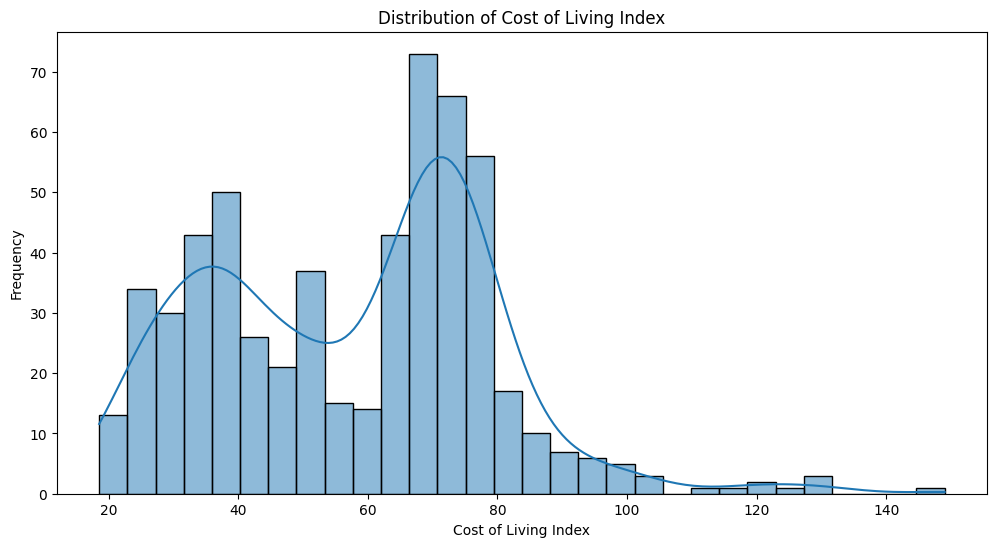

In [30]:

plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Cost of Living Index'], bins=30, kde=True)
plt.title('Distribution of Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Frequency')
plt.show()


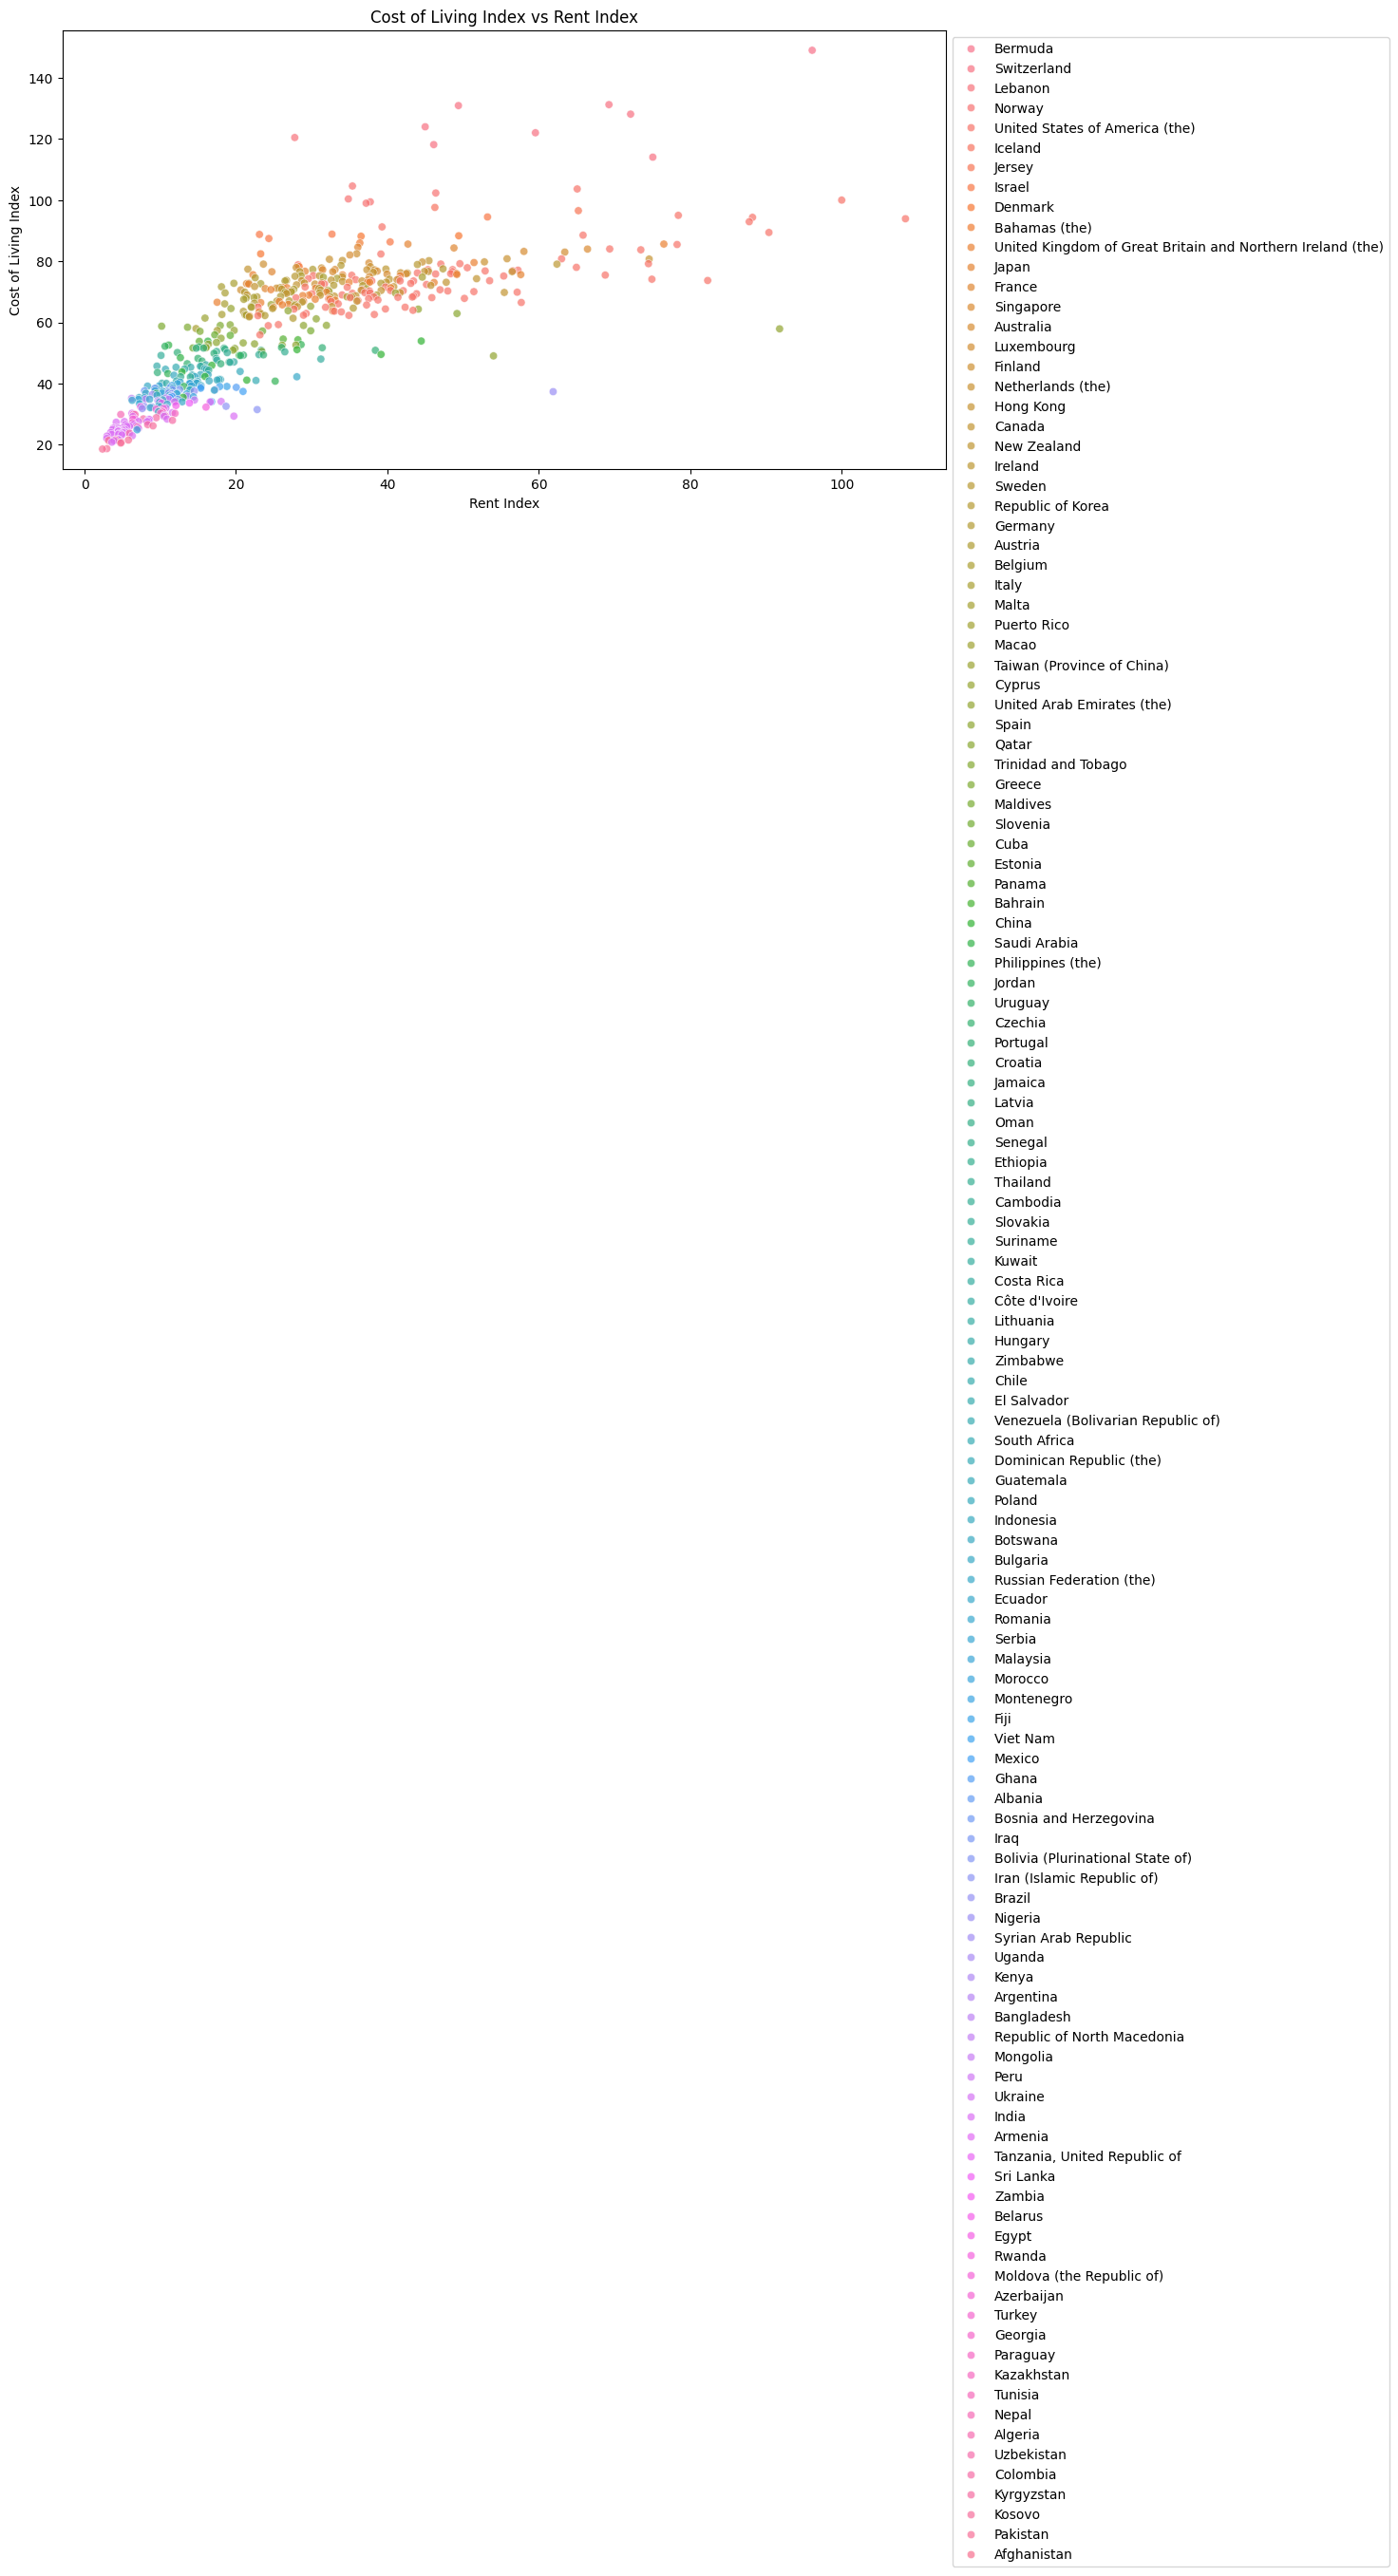

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Rent Index', y='Cost of Living Index', hue='Country', alpha=0.7)
plt.title('Cost of Living Index vs Rent Index')
plt.xlabel('Rent Index')
plt.ylabel('Cost of Living Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-32-57904c76418d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Cost of Living Index', palette='viridis')


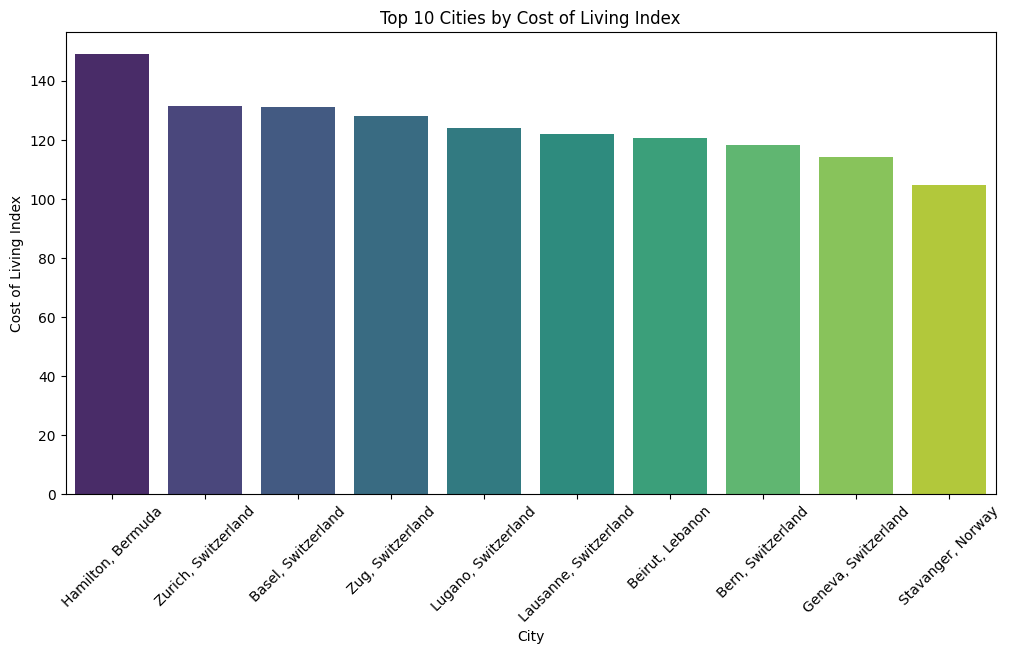

In [32]:
top_cities = merged_data.nlargest(10, 'Cost of Living Index')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Cost of Living Index', palette='viridis')
plt.title('Top 10 Cities by Cost of Living Index')
plt.xlabel('City')
plt.ylabel('Cost of Living Index')
plt.xticks(rotation=45)
plt.show()


In [33]:
# Assume a salary in USD
salary_usd = 50000  # Example salary

# Calculate purchasing power for each index
merged_data['Purchasing Power Cost of Living'] = salary_usd / merged_data['Cost of Living Index']
merged_data['Purchasing Power Rent'] = salary_usd / merged_data['Rent Index']
merged_data['Purchasing Power Groceries'] = salary_usd / merged_data['Groceries Index']
merged_data['Purchasing Power Restaurant'] = salary_usd / merged_data['Restaurant Price Index']
merged_data['Purchasing Power Local Purchasing Power'] = salary_usd / merged_data['Local Purchasing Power Index']


In [34]:
# Get top 5 places for each purchasing power index
top_5_cost_of_living = merged_data.nlargest(5, 'Purchasing Power Cost of Living')[['Country', 'City', 'Purchasing Power Cost of Living']]
top_5_rent = merged_data.nlargest(5, 'Purchasing Power Rent')[['Country', 'City', 'Purchasing Power Rent']]
top_5_groceries = merged_data.nlargest(5, 'Purchasing Power Groceries')[['Country', 'City', 'Purchasing Power Groceries']]
top_5_restaurant = merged_data.nlargest(5, 'Purchasing Power Restaurant')[['Country', 'City', 'Purchasing Power Restaurant']]
top_5_local_purchasing_power = merged_data.nlargest(5, 'Purchasing Power Local Purchasing Power')[['Country', 'City', 'Purchasing Power Local Purchasing Power']]

print("Top 5 Places by Purchasing Power - Cost of Living:\n", top_5_cost_of_living)
print("\nTop 5 Places by Purchasing Power - Rent:\n", top_5_rent)
print("\nTop 5 Places by Purchasing Power - Groceries:\n", top_5_groceries)
print("\nTop 5 Places by Purchasing Power - Restaurant Prices:\n", top_5_restaurant)
print("\nTop 5 Places by Purchasing Power - Local Purchasing Power:\n", top_5_local_purchasing_power)


Top 5 Places by Purchasing Power - Cost of Living:
       Country                  City  Purchasing Power Cost of Living
577  Pakistan    Peshawar, Pakistan                      2695.417790
576  Pakistan      Multan, Pakistan                      2676.659529
575  Pakistan  Rawalpindi, Pakistan                      2436.647173
574  Pakistan     Karachi, Pakistan                      2409.638554
573     India         Kanpur, India                      2405.002405

Top 5 Places by Purchasing Power - Rent:
          Country                City  Purchasing Power Rent
577     Pakistan  Peshawar, Pakistan           21097.046414
566        India        Jammu, India           17006.802721
576     Pakistan    Multan, Pakistan           17006.802721
565        India         Agra, India           16835.016835
571  Afghanistan  Kabul, Afghanistan           15772.870662

Top 5 Places by Purchasing Power - Groceries:
          Country                   City  Purchasing Power Groceries
571  Afghanista

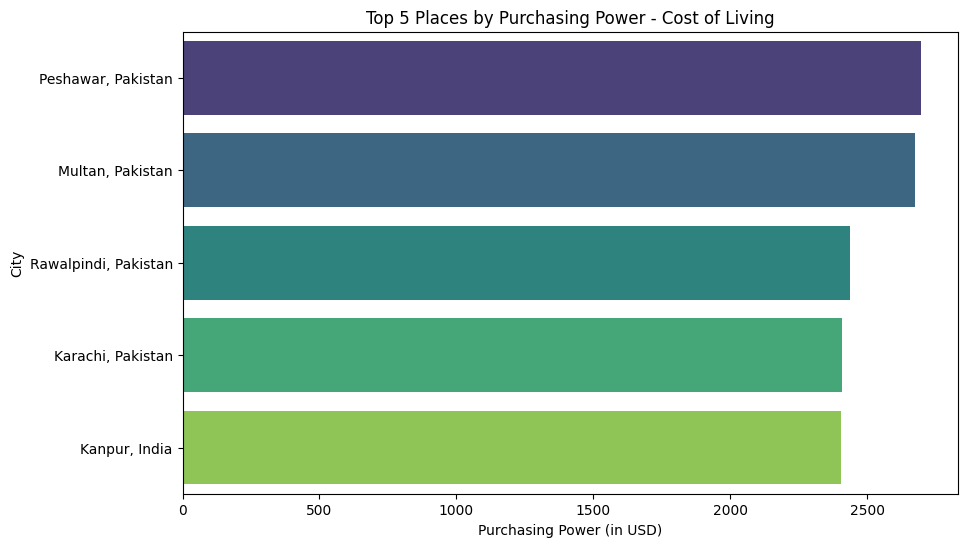

In [51]:

# Function to plot the top 5 places for each index
def plot_top_5(df, title, index_column):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=index_column, y='City', hue='City', palette='viridis', legend=False)
    plt.title(title)
    plt.xlabel('Purchasing Power (in USD)')
    plt.ylabel('City')
    plt.show()

# Plotting for each index
plot_top_5(top_5_cost_of_living, 'Top 5 Places by Purchasing Power - Cost of Living', 'Purchasing Power Cost of Living')


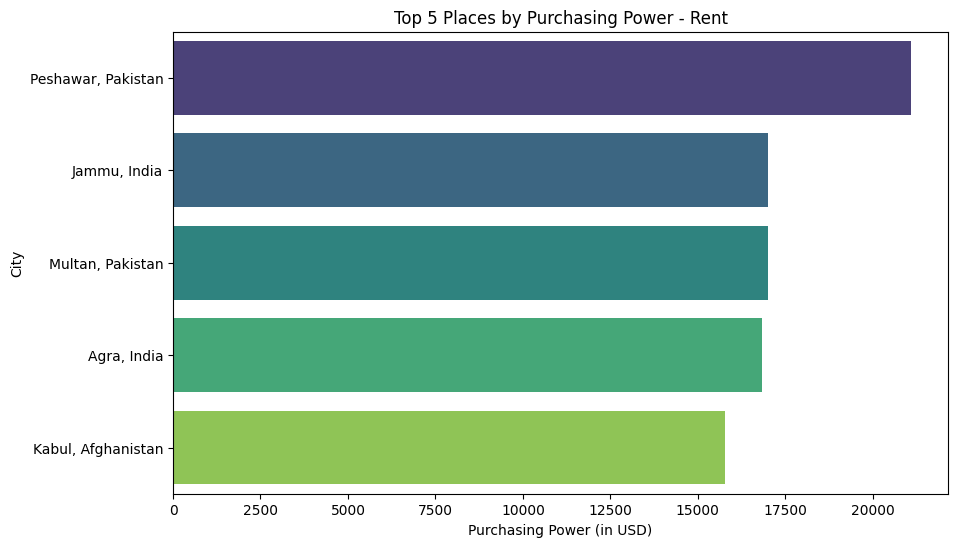

In [52]:
plot_top_5(top_5_rent, 'Top 5 Places by Purchasing Power - Rent', 'Purchasing Power Rent')


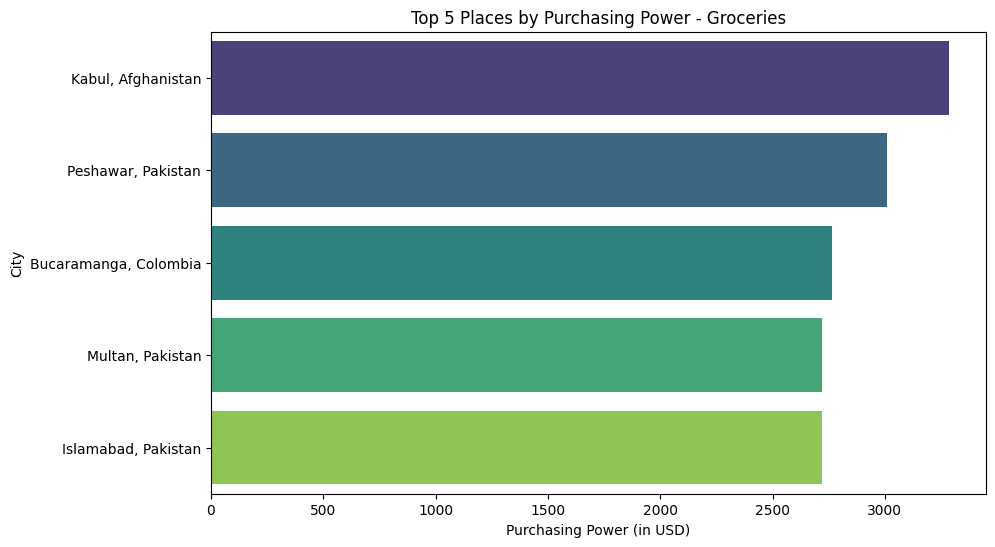

In [53]:
plot_top_5(top_5_groceries, 'Top 5 Places by Purchasing Power - Groceries', 'Purchasing Power Groceries')


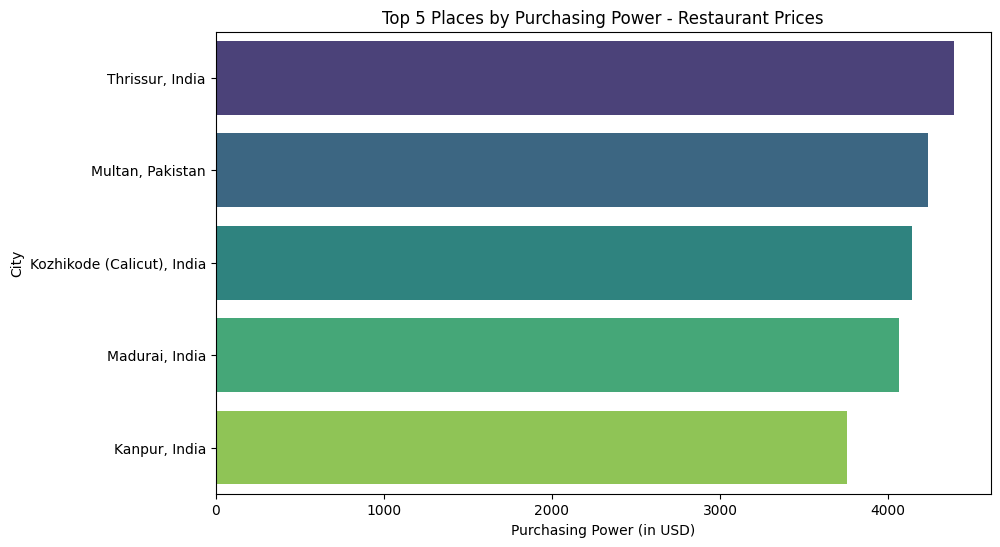

In [54]:
plot_top_5(top_5_restaurant, 'Top 5 Places by Purchasing Power - Restaurant Prices', 'Purchasing Power Restaurant')


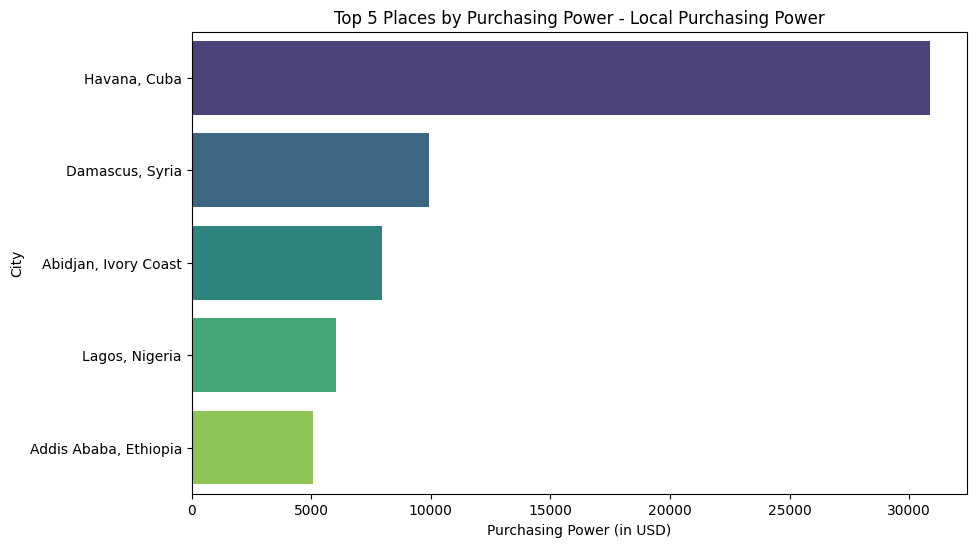

In [55]:
plot_top_5(top_5_local_purchasing_power, 'Top 5 Places by Purchasing Power - Local Purchasing Power', 'Purchasing Power Local Purchasing Power')
